In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (1)データの読み込みと確認

In [2]:
df = pd.read_csv("./data/senkei.csv", index_col=0)

# 読み込みデータ
print(df.head(10))

# 説明変数insta_good
X = df.iloc[:, 2].values
X = X.reshape(-1,1)

# 目的変数sales
Y = df.iloc[:, 0].values

    sales  insta_post  insta_good  flyer  event  new_item  holiday
ID                                                                
1      62           0          20      0      0         0        0
2      60           0          24      0      0         0        0
3     104           0          26      0      0         0        0
4     102           0          22      0      0         0        0
5     178           0          39      0      0         0        1
6     181           0          47      0      0         0        1
7     116           0          22      0      0         0        0
8     112           0          23      0      0         0        0
9     119           0          25      0      0         0        0
10    121           0          33      0      0         0        0


### (2)回帰分析による予測モデルを作成

In [3]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [4]:
# 予測モデルを作成
clf.fit(X, Y)

# 回帰係数
print("予測モデルの回帰係数: ", clf.coef_)

# 切片
print("予測モデルの切片: ", clf.intercept_)

# 決定係数
print("予測モデルの決定係数: ", clf.score(X, Y))

予測モデルの回帰係数:  [2.05852128]
予測モデルの切片:  101.71515440413765
予測モデルの決定係数:  0.5218980221448157


### (3)重回帰分析による予測モデルを作成

In [5]:
# 説明変数
X = df.iloc[:, 1:7].values

# 目的変数
Y = df.iloc[:, 0].values

# 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数(重回帰分析における回帰係数の呼び方)を算出
df_except_sales = df.iloc[:, 1:7]
print("予測モデルの偏回帰係数: \n",
      pd.DataFrame({"Name":df_except_sales.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients'))

# 切片
print("\n予測モデルの切片: \n", clf.intercept_)

予測モデルの偏回帰係数: 
          Name  Coefficients
2       flyer      0.206098
1  insta_good      0.684993
5     holiday     26.549665
4    new_item     38.905751
0  insta_post     48.871107
3       event    245.436745

予測モデルの切片: 
 131.89410662096924


### (4)重回帰分析による予測モデルを作成（データを標準化する場合）

In [6]:
## データフレームの各列を標準化
# [1]数式で計算する場合
df2 = df.apply(lambda x: (x - np.mean(x)) / np.std(x))
print(df2.head(10))

       sales  insta_post  insta_good     flyer     event  new_item   holiday
ID                                                                          
1  -1.427147   -0.322749   -0.839503 -0.511766 -0.138675  -0.19803 -0.657596
2  -1.447439   -0.322749   -0.723860 -0.511766 -0.138675  -0.19803 -0.657596
3  -1.001013   -0.322749   -0.666038 -0.511766 -0.138675  -0.19803 -0.657596
4  -1.021305   -0.322749   -0.781681 -0.511766 -0.138675  -0.19803 -0.657596
5  -0.250205   -0.322749   -0.290198 -0.511766 -0.138675  -0.19803  1.520691
6  -0.219767   -0.322749   -0.058912 -0.511766 -0.138675  -0.19803  1.520691
7  -0.879260   -0.322749   -0.781681 -0.511766 -0.138675  -0.19803 -0.657596
8  -0.919844   -0.322749   -0.752770 -0.511766 -0.138675  -0.19803 -0.657596
9  -0.848822   -0.322749   -0.694949 -0.511766 -0.138675  -0.19803 -0.657596
10 -0.828530   -0.322749   -0.463663 -0.511766 -0.138675  -0.19803 -0.657596


In [7]:
# [2]Sklearnの機能を用いる場合
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = pd.DataFrame(sc.fit_transform(df))
print(df3.head(10))

          0         1         2         3         4        5         6
0 -1.427147 -0.322749 -0.839503 -0.511766 -0.138675 -0.19803 -0.657596
1 -1.447439 -0.322749 -0.723860 -0.511766 -0.138675 -0.19803 -0.657596
2 -1.001013 -0.322749 -0.666038 -0.511766 -0.138675 -0.19803 -0.657596
3 -1.021305 -0.322749 -0.781681 -0.511766 -0.138675 -0.19803 -0.657596
4 -0.250205 -0.322749 -0.290198 -0.511766 -0.138675 -0.19803  1.520691
5 -0.219767 -0.322749 -0.058912 -0.511766 -0.138675 -0.19803  1.520691
6 -0.879260 -0.322749 -0.781681 -0.511766 -0.138675 -0.19803 -0.657596
7 -0.919844 -0.322749 -0.752770 -0.511766 -0.138675 -0.19803 -0.657596
8 -0.848822 -0.322749 -0.694949 -0.511766 -0.138675 -0.19803 -0.657596
9 -0.828530 -0.322749 -0.463663 -0.511766 -0.138675 -0.19803 -0.657596


In [8]:
# 説明変数
X = df2.iloc[:, 1:7].values

# 目的変数
Y = df2.iloc[:, 0].values

# 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数を算出
df2_except_sales = df2.iloc[:, 1:7]
print("\n予測モデルの偏回帰係数（標準化データを基にした場合）: \n",
      pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients'))

# 切片
print("\n予測モデルの切片: ", clf.intercept_)


予測モデルの偏回帰係数（標準化データを基にした場合）: 
          Name  Coefficients
4    new_item      0.075220
5     holiday      0.123663
0  insta_post      0.144937
1  insta_good      0.240394
3       event      0.338815
2       flyer      0.424020

予測モデルの切片:  1.7138002853310525e-17


### (5)重回帰分析による予測モデルの評価（データを標準化する場合）学習及びテストを実行

In [9]:
# (4)と同じ説明変数
X = df2.iloc[:, 1:7].values

# (4)と同じ目的変数
Y = df2.iloc[:, 0].values

# #学習用データとテスト用データを7:3に分割する
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 学習用データで予測モデルを作成
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

# 偏回帰係数を算出
df2_except_sales = df2.iloc[:, 1:7]
print("予測モデルの偏回帰係数（標準化データを基にした場合）: \n",
      pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":model.coef_}).sort_values(by='Coefficients') )

# 切片
print("\n予測モデルの切片: ", model.intercept_)

予測モデルの偏回帰係数（標準化データを基にした場合）: 
          Name  Coefficients
4    new_item     -0.126168
5     holiday      0.072950
0  insta_post      0.156640
1  insta_good      0.273089
3       event      0.302502
2       flyer      0.453244

予測モデルの切片:  0.02961603518882734


In [10]:
# 学習データからの予測値
pred_train = model.predict(X_train)
print(pred_train)

# テストデータからの予測値
pred_test = model.predict(X_test)
print(pred_test)

[-0.15922217 -0.444452   -0.42866158 -0.45234721  1.16265262  1.3452447
 -0.29444297 -0.54708976  1.53472979 -0.52340413  0.06184378 -0.31023339
 -0.53129934 -0.51550891 -0.53129934 -0.54708976 -0.02699231  0.49945479
 -0.38918552  4.35609909 -0.49182328  1.41540825 -0.16711738 -0.11185089
 -0.13553653  1.07680748 -0.38918552 -0.54708976 -0.42866158 -0.23817429
 -0.5076137   0.0687368  -0.37339509 -0.56288019  0.71262552  1.53383643
 -0.37339509]
[-0.48392806 -0.53129934 -0.36449768 -0.52340413 -0.23027908 -0.15132695
 -0.17501259  1.04422444  0.17828321 -0.49971849 -0.5076137  -0.49971849
 -0.23817429 -0.49971849  0.04605335  1.26629257]


In [11]:
# 平均二乗誤差
"""
【説明】平均二乗誤差 (MSE)
それぞれのデータに対して、実際の値と予測値の差の2乗を計算し、その総和をとり、データの総数で割った値。
平均二乗誤差 (MSE)では、値が小さいほど誤差の少ないモデルと言える。
"""
print('\nX_trainを使ったモデルの平均二乗誤差={:0.2f}'.format(np.mean((np.array(Y_train, dtype = int) - pred_train) ** 2)))
print('X_testを使ったモデルの平均二乗誤差={:0.2f}'.format(np.mean((np.array(Y_test, dtype = int) - pred_test) ** 2)))


X_trainを使ったモデルの平均二乗誤差=0.36
X_testを使ったモデルの平均二乗誤差=0.20


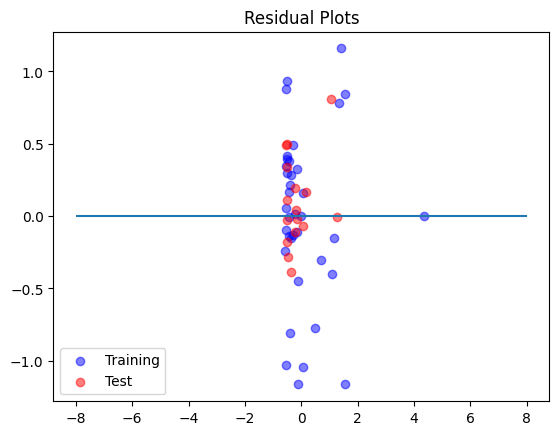

In [12]:
# 残差プロット
"""
【説明】残差プロット
重回帰分析での回帰診断のために用いられる散布図。
横軸に説明変数または予測値をとり、縦軸に回帰残差をとってプロットしたもの。
何らかの規則性や分散の偏りがあるか等を判断することができる。

【説明】回帰残差
回帰直線から垂直に伸ばした各データ値までの距離を指す。
"""
# 学習用データの残差プロット
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平線を描画
plt.hlines(y=0,xmin=-8,xmax=8)

# 描画
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')
plt.show()